# Algoritmo de exploração + Criação do modelo

Esse código foi feito para explorar um conjunto de dados bancários de clientes do Kaggle e criar um modelo de classificação

## Dicionário de dados


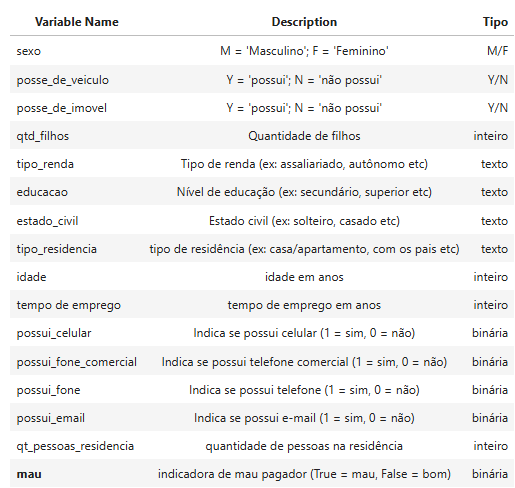

# Importação das bibliotecas

In [14]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report
)
from sklearn import metrics

#Leitura e pré-processamento dos dados

In [ ]:
df = pd.read_csv('trusted_dataset.csv')

df

Quantidade de linhas e colunas do dataframe:
 16650 linhas 
 16 colunas 

Quantidade de linhas duplicadas: 9880
Quantidade de linhas após remoção: 6770 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   6770 non-null   object 
 1   posse_de_veiculo       6770 non-null   object 
 2   posse_de_imovel        6770 non-null   object 
 3   qtd_filhos             6770 non-null   int64  
 4   tipo_renda             6770 non-null   object 
 5   educacao               6770 non-null   object 
 6   estado_civil           6770 non-null   object 
 7   tipo_residencia        6770 non-null   object 
 8   idade                  6770 non-null   float64
 9   tempo_emprego          6770 non-null   float64
 10  possui_celular         6770 non-null   int64  
 11  possui_fone_comercial  6770 non-null   int64  
 12  possui

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
3,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
4,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


#Entendimento dos dados - Análise univariada

Distribuição da variável resposta (mau):
mau
Adimplentes      6472
Inadimplentes     298
Name: count, dtype: int64

Distribuição percentual da variável resposta (mau):
mau
Adimplentes      95.6
Inadimplentes     4.4
Name: proportion, dtype: float64


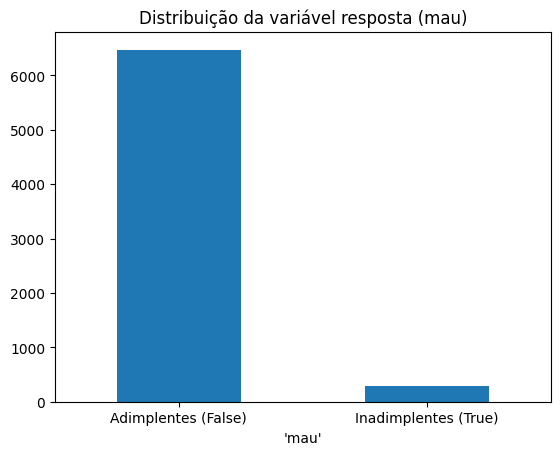

In [17]:
print('Distribuição da variável resposta (mau):')
print(df.mau.value_counts().rename(
    {False: 'Adimplentes',
     True: 'Inadimplentes'}))

print('\nDistribuição percentual da variável resposta (mau):')
print(round(df.mau.value_counts(normalize=True).rename(
    {False: 'Adimplentes',
     True: 'Inadimplentes'}) * 100, 2))

df['mau'].value_counts().plot.bar(rot=0)
plt.title(label='Distribuição da variável resposta (mau)')
plt.xlabel(xlabel="'mau'")
plt.xticks(ticks=[0,1],
           labels=['Adimplentes (False)', 'Inadimplentes (True)'])
plt.show()

#Gráficos de barras

posse_de_veiculo
N    4211
Y    2559
Name: count, dtype: int64


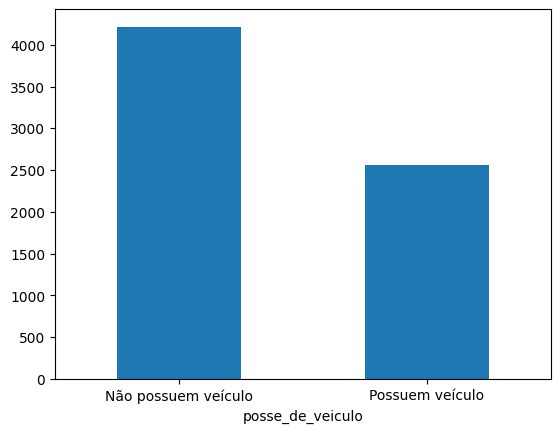

In [18]:
print(df['posse_de_veiculo'].value_counts())

df['posse_de_veiculo'].value_counts().plot.bar(rot=0)
plt.xticks(ticks=[0,1],
           labels=['Não possuem veículo', 'Possuem veículo'])
plt.show()

posse_de_imovel
Y    4493
N    2277
Name: count, dtype: int64


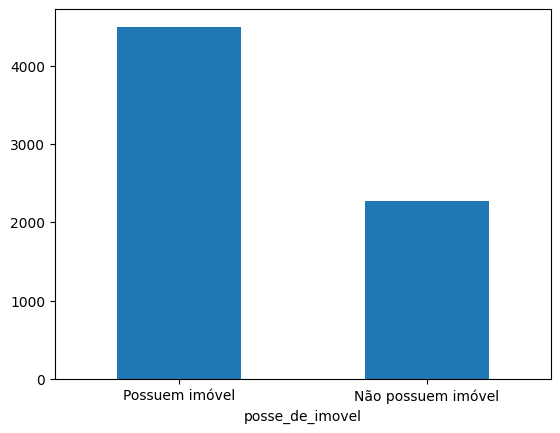

In [19]:
print(df['posse_de_imovel'].value_counts())

df['posse_de_imovel'].value_counts().plot.bar(rot=0)
plt.xticks(ticks=[0,1],
           labels=['Possuem imóvel', 'Não possuem imóvel'])
plt.show()

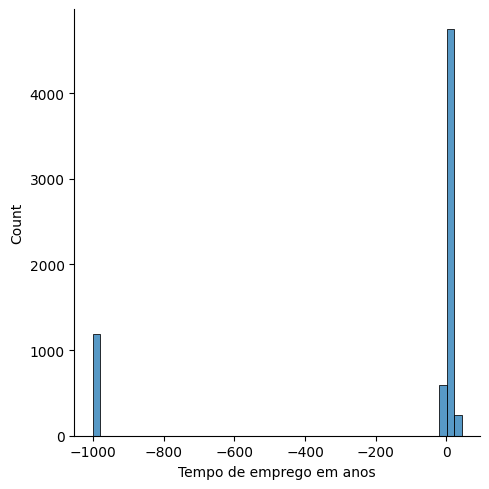

In [20]:
sns.displot(data=df,
            x="tempo_emprego",
            bins=50)
plt.xlabel('Tempo de emprego em anos')
plt.show()

#Alterando valores de -1000 pra -2, para melhor visualização no gráfico:

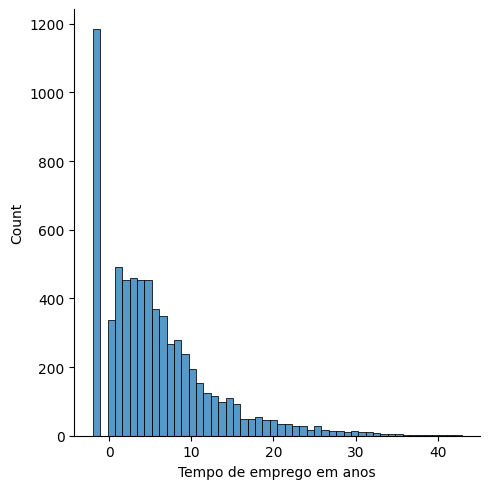

In [21]:
df.loc[df["tempo_emprego"]<0, "tempo_emprego"] = -2

sns.displot(data=df,
            x="tempo_emprego",
            bins = 50)
plt.xlabel('Tempo de emprego em anos')
plt.show()

#Histogramas

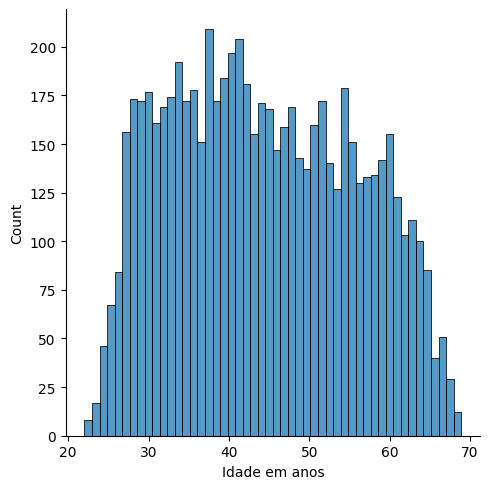

In [22]:
sns.displot(data=df,
            x="idade",
            bins=50)
plt.xlabel('Idade em anos')
plt.show()

#Entendimento dos dados - Análise bivariada

/tmp/ipython-input-4198719700.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


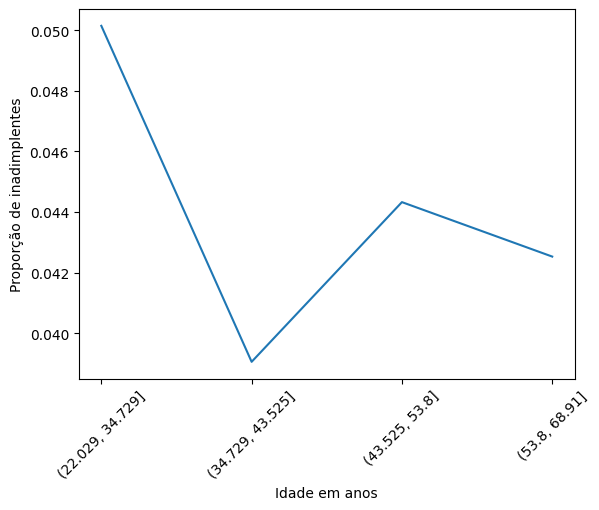

In [23]:
cat_srs, bins = pd.qcut(x=df['idade'],
                        q=4,
                        retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_xlabel(xlabel='Idade em anos')
ax.set_ylabel(ylabel="Proporção de inadimplentes")
ticks = plt.xticks(ticks=range(len(biv.index.values)),
                   labels=biv.index.values,
                   rotation=45)

/tmp/ipython-input-2374135297.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


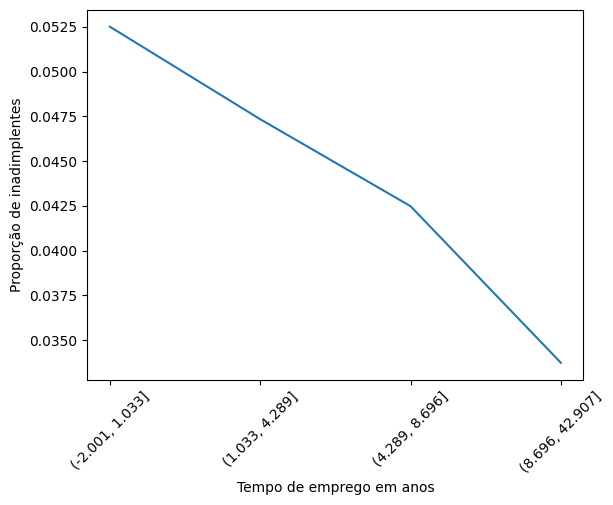

In [24]:
cat_srs, bins = pd.qcut(x=df['tempo_emprego'],
                        q=4,
                        retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_xlabel(xlabel="Tempo de emprego em anos")
ax.set_ylabel(ylabel="Proporção de inadimplentes")
ticks = plt.xticks(ticks=range(len(biv.index.values)),
                   labels=biv.index.values,
                   rotation=45)

plt.show()

#Quantidade de categorias por variável

In [25]:
df_metadados = pd.DataFrame(data=df.dtypes)
df_metadados.columns = ['tipo_dados']

qtd_categorias = []

for coluna in df.columns:
    qtd_categorias.append(df[coluna].nunique())

df_metadados['qtd_categorias'] = qtd_categorias
df_metadados

,tipo_dados,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#Conversão das variáveis categóricas em variáveis numéricas (dummies)

In [26]:
df = pd.get_dummies(data=df.copy(),
                    columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel'],
                    drop_first=True)

df = pd.get_dummies(data=df)

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   bool   
 10  posse_de_veiculo_Y                      6770 non-null   bool

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,False,True,False,False,False,False
2,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
3,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,27.482192,4.024658,1,0,1,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,34.857534,3.101370,1,1,1,0,1.0,True,False,...,False,False,True,False,False,True,False,False,False,False
6766,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,False,False,False,False,True,False,False,False,False
6767,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
6768,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,False,False,False,False,True,False,False,False,False


In [27]:
df.dtypes.to_frame(name='Dtype')

,Dtype
qtd_filhos,int64
idade,float64
tempo_emprego,float64
possui_celular,int64
possui_fone_comercial,int64
possui_fone,int64
possui_email,int64
qt_pessoas_residencia,float64
mau,bool
sexo_M,bool


#Dividindo a base em treino e teste

In [28]:
# X = Variáveis explicativas:
X = df.drop(columns='mau')
print('Quantidade de linhas e colunas das variáveis explicativas (X):',
      X.shape, '\n')

# y = Variável resposta:
y = df.mau
print('Quantidade de linhas da variável resposta (y):',
      len(y), '\n\n')

# Separando a base em 70% para treinamento e 30% para validação:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=100)

print('Quantidade de linhas e colunas de X_train (70%):',
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):',
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):',
      len(y_train))
print('Quantidade de linhas de y_test (30%):',
      len(y_test))

Quantidade de linhas e colunas das variáveis explicativas (X): (6770, 32) 

Quantidade de linhas da variável resposta (y): 6770 


Quantidade de linhas e colunas de X_train (70%): (4739, 32)
Quantidade de linhas e colunas de X_test (30%): (2031, 32) 

Quantidade de linhas de y_train (70%): 4739
Quantidade de linhas de y_test (30%): 2031


#RandomForestClassifier

In [29]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [32]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 94.34%


#Matriz de confusão:

In [33]:
tab = pd.crosstab(index = y_pred,
                  columns = y_test)
tab

mau,False,True
row_0,,
False,1911,82
True,33,5


#DecisionTreeClassifier #1

In [34]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X=X_train,
              y=y_train)
clf

DecisionTreeClassifier(random_state=100)

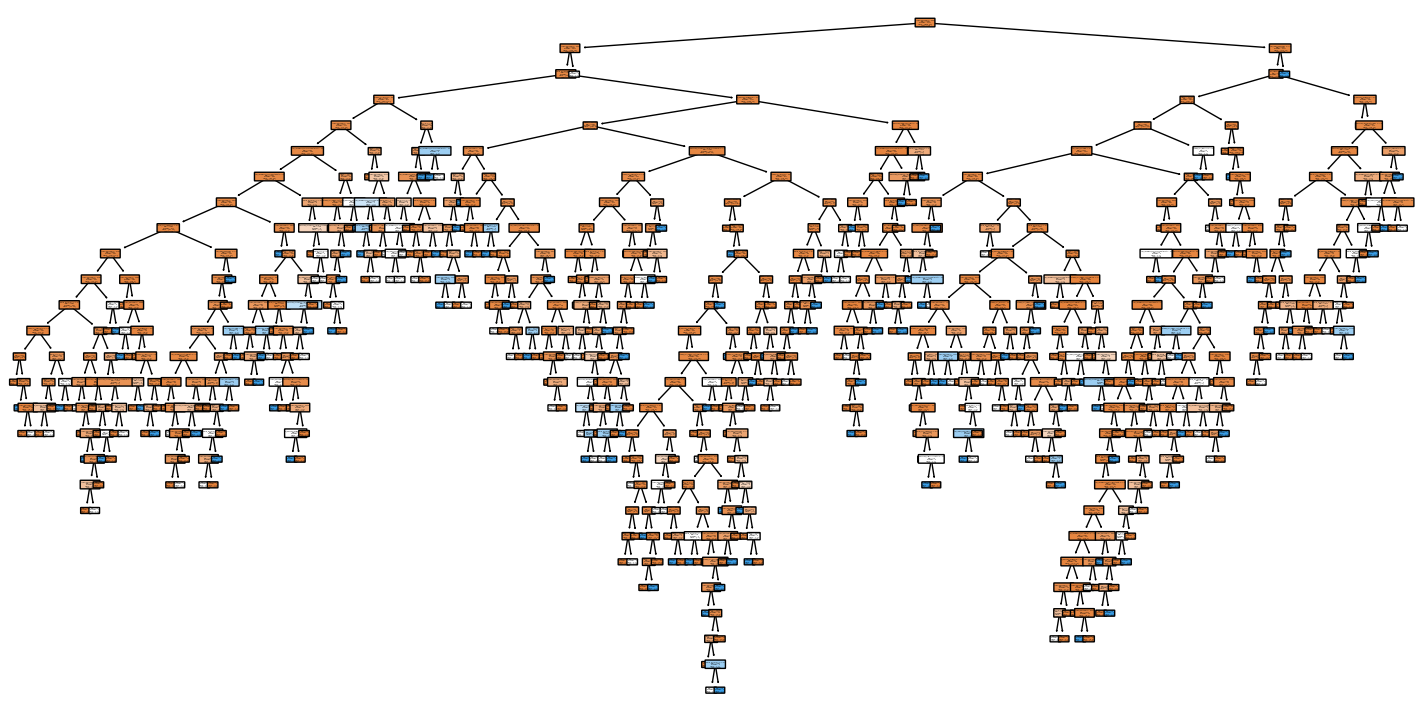

In [35]:
plt.figure(figsize=(18,9))
plot_tree(decision_tree=clf,
          feature_names=X_train.columns,
          class_names=['bons', 'maus'],
          filled=True,
          rounded=True)

plt.show()

#Matriz de confusão para a base de treino:

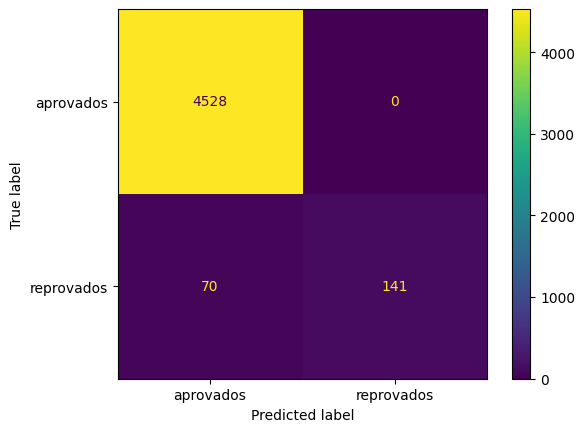

In [36]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                      X=X_train,
                                      y=y_train,
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

#Acurácia na base de treinamento:

In [37]:
predict_train = clf.predict(X=X_train)
accuracy_score(y_true=y_train,
               y_pred=predict_train)

0.9852289512555391

In [38]:
predict_test = clf.predict(X=X_test)

print('Valores preditos:')
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
False    1930
True      101
Name: count, dtype: int64 

Valores reais:
mau
False    1944
True       87
Name: count, dtype: int64


#Matriz de confusão para a base de teste:

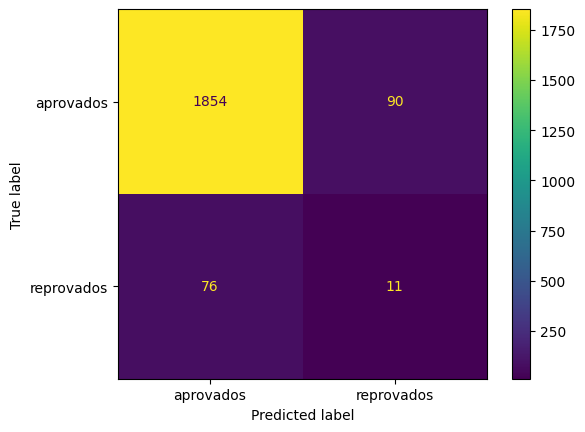

In [39]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

#Comparação da acurácia entre base de treinamento e base de teste:

In [40]:
print('Acurácia da base de treinamento:',
      accuracy_score(y_true=y_train,
                     y_pred=predict_train), '\n')

print('Acurácia da base de teste:',
      accuracy_score(y_true=y_test,
                     y_pred=predict_test))

Acurácia da base de treinamento: 0.9852289512555391 

Acurácia da base de teste: 0.9182668636139832


#DecisionTreeClassifier #2

In [41]:
nova_clf = DecisionTreeClassifier(max_depth=10,
                                  min_samples_leaf=5,
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train,
                        y=y_train)
nova_clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

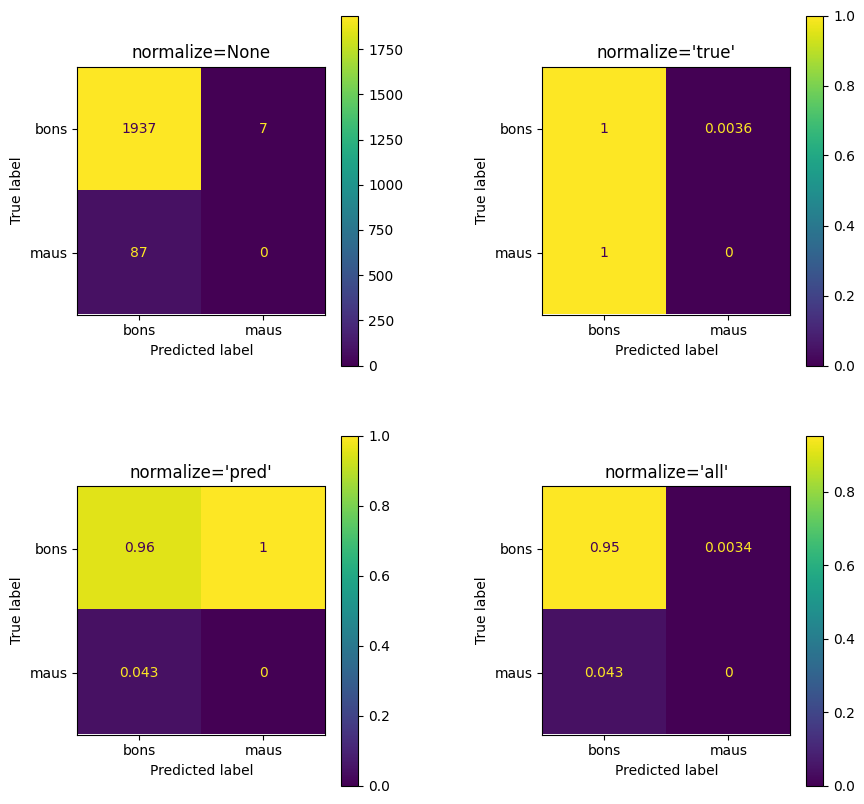

In [42]:
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(10,10))
fig.subplots_adjust(wspace=0.5)

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize=None,
                                      ax=axes[0,0])
axes[0,0].set_title(label="normalize=None")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize='true',
                                      ax=axes[0,1])
axes[0,1].set_title(label="normalize='true'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize='pred',
                                      ax=axes[1,0])
axes[1,0].set_title(label="normalize='pred'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize='all',
                                      ax=axes[1,1])
axes[1,1].set_title(label="normalize='all'")

plt.show()

In [43]:
print("Proporção de proponentes classificados como 'maus':",
      round(7/(1937+87+7)*100, 2),
      '%')

Proporção de proponentes classificados como 'maus': 0.34 %


#Acurácia caso todos os contratos fossem classificados como 'bons':

In [44]:
print("Valores reais:")
print(pd.Series(y_test).value_counts(),
      '\n')

print("Todos os contratos da base teste classificados como 'bons':")
print(pd.Series(y_test.replace(to_replace=True,
                               value=False)
               ).value_counts(),
      '\n')

print('Acurácia:',
      round(accuracy_score(y_true=y_test,
                           y_pred=y_test.replace(to_replace=True,
                                                 value=False)
                          ) * 100,
            2),
      '%')

Valores reais:
mau
False    1944
True       87
Name: count, dtype: int64 

Todos os contratos da base teste classificados como 'bons':
mau
False    2031
Name: count, dtype: int64 

Acurácia: 95.72 %


In [ ]:
import joblib

# supondo que 'model' seja seu modelo já treinado
joblib.dump(clf, "mymodel.pkl")

print("Modelo salvo como mymodel.pkl")

Modelo salvo como mymodel.pkl


# Fim